In [1]:
import twstock

In [6]:
stock = twstock.Stock('5478')

In [7]:
stock.data

[Data(date=datetime.datetime(2018, 8, 21, 0, 0), capacity=113000, turnover=8333000, open=73.4, high=74.8, low=72.4, close=74.0, change=1.5, transaction=99),
 Data(date=datetime.datetime(2018, 8, 22, 0, 0), capacity=80000, turnover=5947000, open=74.1, high=75.0, low=74.0, close=74.7, change=0.7, transaction=71),
 Data(date=datetime.datetime(2018, 8, 23, 0, 0), capacity=124000, turnover=9347000, open=75.9, high=75.9, low=74.7, close=74.7, change=0.0, transaction=114),
 Data(date=datetime.datetime(2018, 8, 24, 0, 0), capacity=49000, turnover=3673000, open=73.7, high=75.0, low=73.7, close=74.4, change=-0.3, transaction=53),
 Data(date=datetime.datetime(2018, 8, 27, 0, 0), capacity=55000, turnover=4116000, open=74.4, high=74.8, low=74.2, close=74.4, change=0.0, transaction=57),
 Data(date=datetime.datetime(2018, 8, 28, 0, 0), capacity=165000, turnover=12350000, open=74.8, high=75.1, low=74.2, close=75.0, change=0.6, transaction=145),
 Data(date=datetime.datetime(2018, 8, 29, 0, 0), capacity

In [8]:
stock.capacity

[113000,
 80000,
 124000,
 49000,
 55000,
 165000,
 125000,
 61000,
 76000,
 62000,
 58000,
 23000,
 61000,
 146000,
 122000,
 128000,
 64000,
 103000,
 206000,
 245000,
 97000,
 93000,
 76000,
 118000,
 87000,
 63000,
 209000,
 119000,
 60000,
 52000,
 72000]

In [58]:
prices = stock.fetch(2018, 10)

In [14]:
type(prices[0])

twstock.stock.Data

In [15]:
prices[0]

Data(date=datetime.datetime(2018, 9, 3, 0, 0), capacity=62000, turnover=4523000, open=72.4, high=73.7, low=72.3, close=72.5, change=0.1, transaction=64)

In [16]:
stock.change

[0.1,
 0.8,
 -0.3,
 0.0,
 -1.7,
 -2.6,
 0.8,
 0.4,
 0.4,
 1.7,
 1.8,
 -2.0,
 -0.6,
 0.1,
 0.6,
 -0.8,
 0.5,
 1.4,
 -0.3]

In [24]:
date, capacity, turnover, openP, highP, lowP, closeP, changeP, transaction = prices[0]

In [25]:
date

datetime.datetime(2018, 9, 3, 0, 0)

In [26]:
capacity

62000

In [27]:
turnover

4523000

In [28]:
twstock.realtime.mock = False

In [42]:
twstock.realtime.get('3026')

{'timestamp': 1538616501.0,
 'info': {'code': '3026',
  'channel': '3026.tw',
  'name': '禾伸堂',
  'fullname': '禾伸堂企業股份有限公司',
  'time': '2018-10-04 09:28:21'},
 'realtime': {'latest_trade_price': '131.50',
  'trade_volume': '1',
  'accumulate_trade_volume': '1896',
  'best_bid_price': ['131.50', '131.00', '130.50', '130.00', '129.50'],
  'best_bid_volume': ['151', '135', '104', '138', '97'],
  'best_ask_price': ['132.00', '132.50', '133.00', '133.50', '134.00'],
  'best_ask_volume': ['30', '86', '121', '109', '85'],
  'open': '131.50',
  'high': '133.00',
  'low': '131.00'},
 'success': True}

In [39]:
stock 

In [31]:
stock.capacity

[62000,
 58000,
 23000,
 61000,
 146000,
 122000,
 128000,
 64000,
 103000,
 206000,
 245000,
 97000,
 93000,
 76000,
 118000,
 87000,
 63000,
 209000,
 119000]

In [44]:
import talib

In [63]:
dateList = []
openList = []
closeList = []
higeList = []
lowList = []
volumeList = []

for data in stock.data:
    dateList.append(data.date)
    openList.append(data.open)
    closeList.append(data.close)
    higeList.append(data.high)
    lowList.append(data.low)
    volumeList.append(data.capacity)

In [61]:
dateList

[datetime.datetime(2018, 10, 1, 0, 0),
 datetime.datetime(2018, 10, 2, 0, 0),
 datetime.datetime(2018, 10, 3, 0, 0)]

In [64]:
volumeList

[60000, 52000, 72000]

In [66]:
import pandas as pd

In [69]:
openList = pd.DataFrame(openList)
closeList = pd.DataFrame(closeList)
higeList = pd.DataFrame(higeList)
lowList = pd.DataFrame(lowList)
volumeList = pd.DataFrame(volumeList)

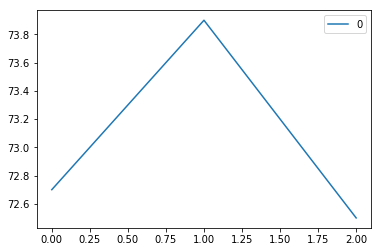

In [74]:
stock5478 = {
    'open': openList.astype(float),
    'close': closeList.astype(float),
    'high': higeList.astype(float),
    'low': lowList.astype(float),
    'volume': volumeList.astype(float)
}

%matplotlib inline

stock5478['open'].plot()

In [76]:
def talib2df(talib_output):
    if type(talib_output) == list:
        ret = pd.DataFrame(talib_output).transpose()
    else:
        ret = pd.Series(talib_output)
    ret.index = tsmc['close'].index
    return ret;
talib2df(talib.STOCH(stock5478)).plot()
stock5478['close'].plot(secondary_y=True)

TypeError: STOCH() takes at least 3 positional arguments (1 given)